In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ETL_house_wayz_final.csv')
# df.info()

In [2]:
# df.describe()

In [3]:
df = df.drop(df[df['建物單價元/坪'] < 10000].index)
df.reset_index(drop=True, inplace=True) #index欄位重新排序!!!
# df

In [4]:

df['建物單價元/坪'] = df['建物單價元/坪'].astype('int').apply(lambda x: round(x/10000,1))
df['建物單價元/坪']

0         62.3
1         72.5
2         38.2
3         45.2
4         58.6
          ... 
143701    48.8
143702    58.0
143703    44.4
143704    44.5
143705    32.8
Name: 建物單價元/坪, Length: 143706, dtype: float64

In [5]:
df["交易月"] = df["交易年月"].apply(lambda x : str(int(x.split("/")[1])))
df['交易年'] = df['交易年'].astype(object)

df = df.drop(["交易年月"], axis=1)
df = df.drop(['土地區段位置建物區段門牌'],axis=1)

In [6]:
# df.dtypes

In [7]:

num_features = []
notnum_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    else:
        notnum_features.append(feature)

print(f'lehgth of all featrues : {len(df.columns)}\n')
print(f'length of Numeric Features : {len(num_features)}\n Numeric Features : {num_features}\n')
print(f'length of Not Numeric Features : {len(notnum_features)}\n Not Numeric Features : {notnum_features}')


lehgth of all featrues : 56

length of Numeric Features : 44
 Numeric Features : ['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '出生人口數', '死亡人口數', '總人口數', '出生率', '死亡率', '移出人口數', '移入人口數', '移出人口率', '移入人口率', 'M1B(年增率)', '車位單價', '車位每個/坪', '建築年', '總樓層數', '總價元', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總價', '車位總坪數', '建物坪數(已扣除車位坪數)', '墳墓', '殯儀館', '八大行業', '市場', '夜市', '加油站', '機場', '瓦斯槽', '變電所', '垃圾場', '廟宇', '高架道路', '建物價格(已扣除車位總價)', '建物單價元/坪']

length of Not Numeric Features : 12
 Not Numeric Features : ['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要用途', '主要建材', '有無管理組織', '車位類別', '土地區段位置建物區段門牌1', '土地區段位置建物區段門牌2', '交易年', '交易月']


In [8]:
renum = ['主要用途','有無管理組織']
for i in renum:
    notnum_features.remove(i)
print(len(notnum_features))
print(notnum_features)

10
['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要建材', '車位類別', '土地區段位置建物區段門牌1', '土地區段位置建物區段門牌2', '交易年', '交易月']


In [9]:
num1 = ['墳墓', '殯儀館', '八大行業', '市場', '夜市', '加油站',
        '機場', '瓦斯槽', '變電所', '垃圾場', '廟宇', '高架道路']

for i in num1:
    num_features.remove(i)

print(len(num_features),num_features)

32 ['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '出生人口數', '死亡人口數', '總人口數', '出生率', '死亡率', '移出人口數', '移入人口數', '移出人口率', '移入人口率', 'M1B(年增率)', '車位單價', '車位每個/坪', '建築年', '總樓層數', '總價元', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總價', '車位總坪數', '建物坪數(已扣除車位坪數)', '建物價格(已扣除車位總價)', '建物單價元/坪']


In [10]:
# for i in num_features:
#     qt1 = df[i].quantile(q=0.25)
#     qt3 = df[i].quantile(q=0.75)
#     iqr = qt3-qt1
    
#     display(df[i][df[i]<(qt1 - 1.5*iqr)]) ###低於下限的離群值!!
#     display(df[i][df[i]>(qt3 + 1.5*iqr)]) ###高於上限的離群值!!
#     plt.boxplot(df[i])  ###用 matplotlib 畫 boxplot(離群值)
#     plt.show()

# 離群值處理!!!

In [11]:
# import seaborn as sns
# from matplotlib.font_manager import FontProperties
# prop = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')
# sns.set(font=prop.get_family())
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
# #-----------------------設定中文字型-------------------

# for i in num_features:
#     qt1 = df[i].quantile(q=0.25)
#     qt3 = df[i].quantile(q=0.75)
#     iqr = qt3-qt1
    
#     display(df[i][df[i]<(qt1 - 1.5*iqr)]) ###低於下限的離群值!!
#     display(df[i][df[i]>(qt3 + 1.5*iqr)]) ###高於上限的離群值!!
#     plt.boxplot(df[i])  ###用 matplotlib 畫 boxplot(離群值)
#     plt.show()

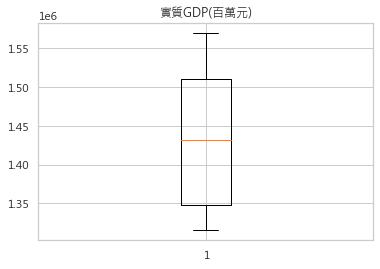

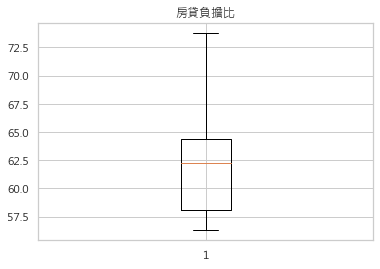

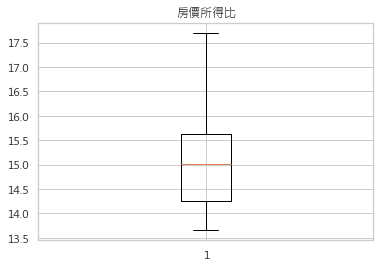

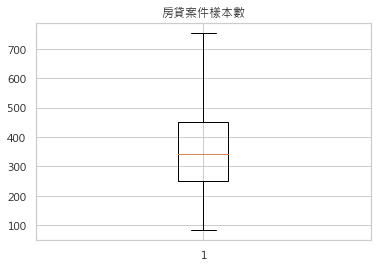

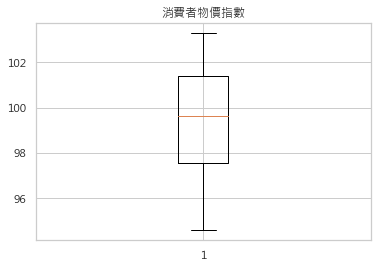

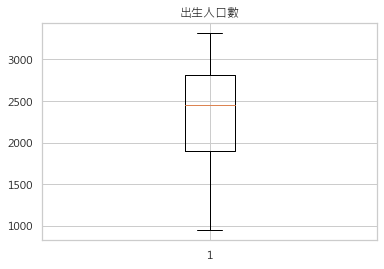

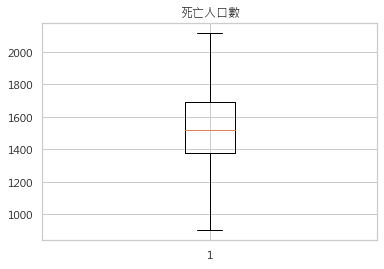

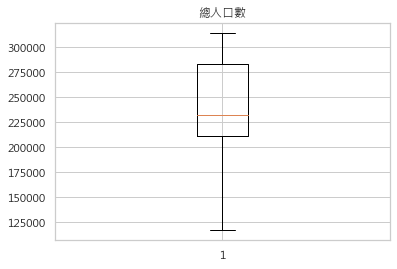

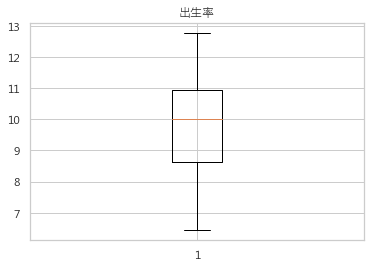

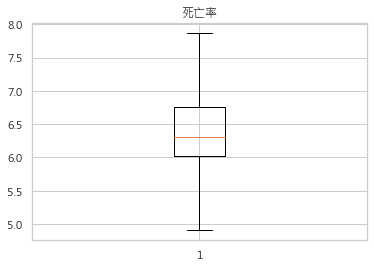

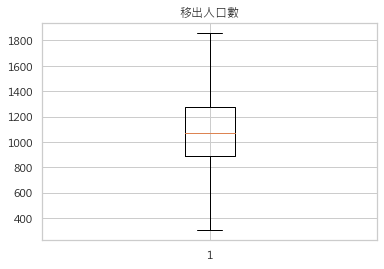

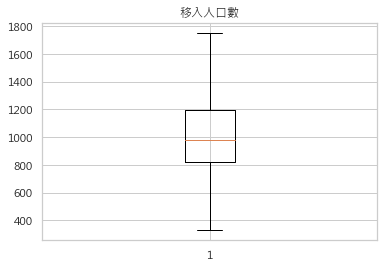

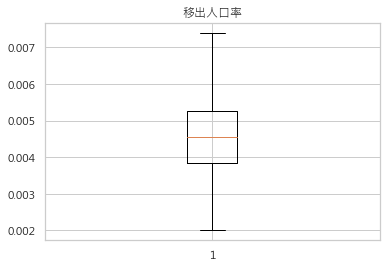

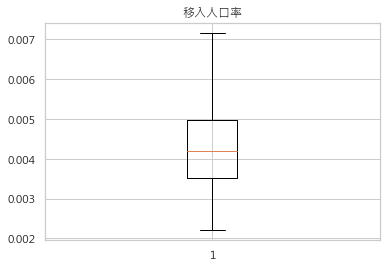

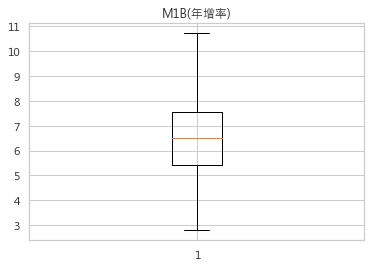

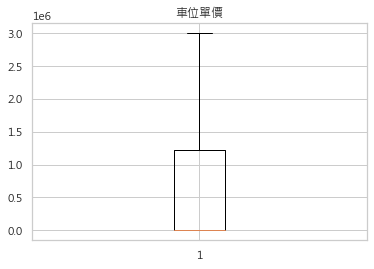

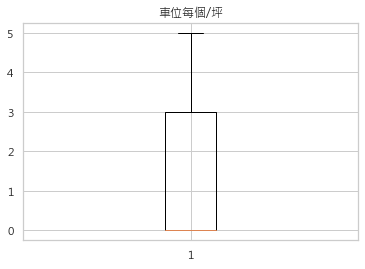

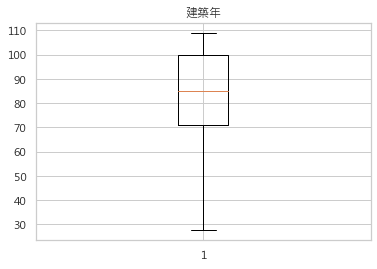

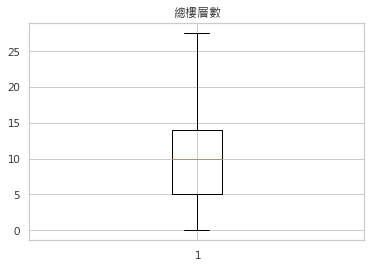

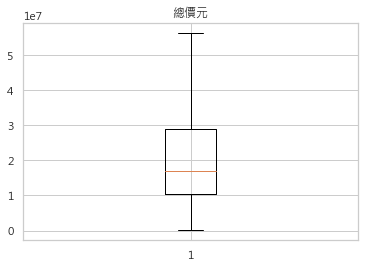

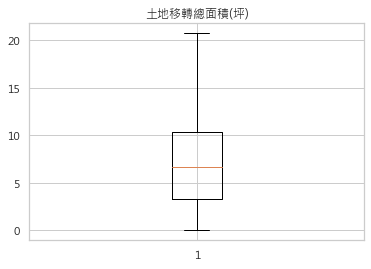

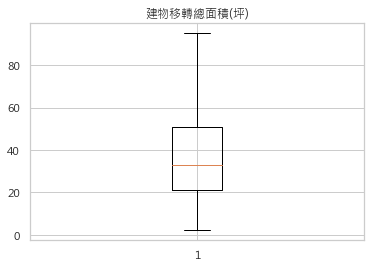

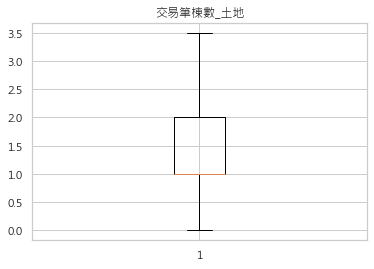

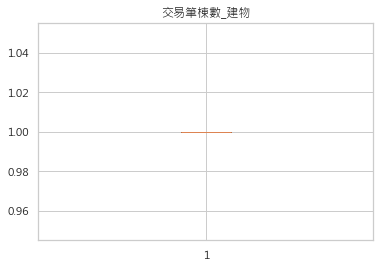

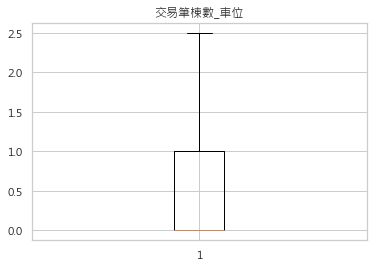

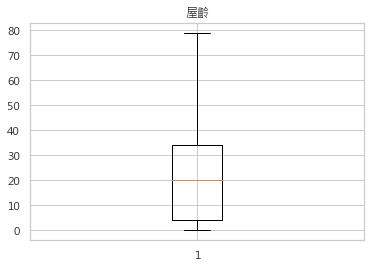

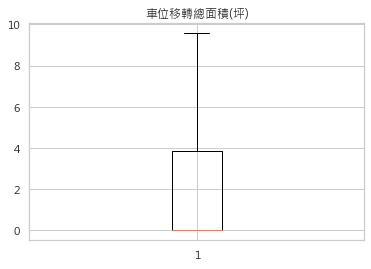

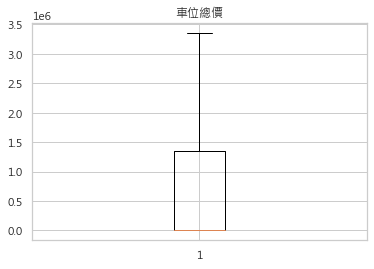

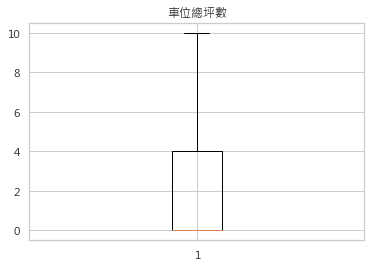

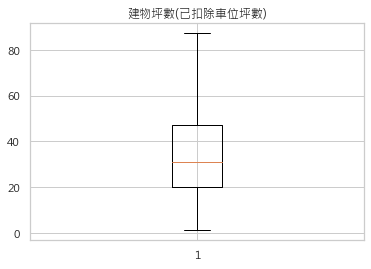

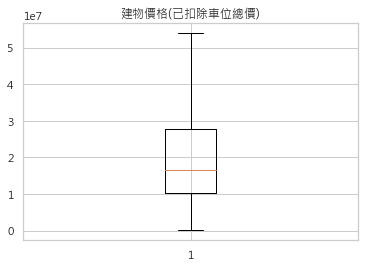

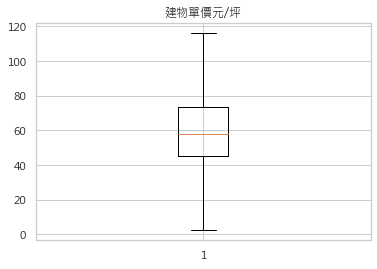

In [12]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')
sns.set(font=prop.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
#-----------------------設定中文字型-------------------

for i,f in enumerate(num_features):
    ori_series = df[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    ori_series[ori_series>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
    ori_series[ori_series<(qt1 - 1.5*iqr)] = qt1 - 1.5*iqr
    df[f] = ori_series
    #--------------------------------------------------------#
    plt.title(f) 
    plt.boxplot(df[f])
    plt.show()

In [13]:
df['建物單價元/坪'] = np.log1p(df['建物單價元/坪'])
# df['建物單價元/坪']

# 相關係數處理

In [14]:
# corr = df.corr()  ###顯示相關係數!!!
# display(corr)

In [15]:
corr = df.corr()
corr_drop = corr.iloc[-1,:] 
corr_drop

實質GDP(百萬元)       0.021620
房貸負擔比           -0.021767
房價所得比           -0.023279
房貸案件樣本數         -0.011521
消費者物價指數          0.011988
出生人口數           -0.095983
死亡人口數           -0.053327
總人口數            -0.019789
出生率             -0.129405
死亡率             -0.033308
移出人口數            0.177137
移入人口數            0.151853
移出人口率            0.223005
移入人口率            0.191391
M1B(年增率)         0.035246
車位單價             0.114955
車位每個/坪           0.067768
建築年              0.229149
總樓層數             0.216362
總價元              0.460069
土地移轉總面積(坪)      -0.125905
建物移轉總面積(坪)       0.041534
交易筆棟數_土地         0.022230
交易筆棟數_建物              NaN
交易筆棟數_車位         0.093147
屋齡              -0.220121
車位移轉總面積(坪)       0.093784
車位總價             0.120433
車位總坪數            0.107930
建物坪數(已扣除車位坪數)    0.032585
墳墓              -0.007741
殯儀館             -0.000877
八大行業                  NaN
市場               0.000069
夜市               0.058139
加油站              0.030697
機場               0.032178
瓦斯槽             -0.016067
變電所         

In [16]:
#有高度相關性的欄位
corr_drop[(corr_drop>0.03) | (corr_drop<-0.03)].index ### | =>或者or...(此步驟在去除0.3~-0.3低度負相關的資料!!!)

Index(['出生人口數', '死亡人口數', '出生率', '死亡率', '移出人口數', '移入人口數', '移出人口率', '移入人口率',
       'M1B(年增率)', '車位單價', '車位每個/坪', '建築年', '總樓層數', '總價元', '土地移轉總面積(坪)',
       '建物移轉總面積(坪)', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總價', '車位總坪數',
       '建物坪數(已扣除車位坪數)', '夜市', '加油站', '機場', '變電所', '建物價格(已扣除車位總價)', '建物單價元/坪'],
      dtype='object')

In [17]:
#移除低相關欄位(手動!!)
renum = ['出生人口數','死亡人口數','死亡率','移出人口數', '移入人口數','車位單價', '車位每個/坪',
        '總價元','交易筆棟數_車位','車位移轉總面積(坪)','車位總坪數','建物坪數(已扣除車位坪數)',
         '車位總價','建物價格(已扣除車位總價)']

for ii in renum:
    num_features.remove(ii)
print(num_features)

['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '總人口數', '出生率', '移出人口率', '移入人口率', 'M1B(年增率)', '建築年', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '屋齡', '建物單價元/坪']


In [18]:
#將消除的低相關的欄位
rm2 = []
for i in num_features:
    if i not in corr_drop[(corr_drop>0.03) | (corr_drop<-0.03)].index:
        rm2.append(i)
print(rm2)

['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '總人口數', '交易筆棟數_土地', '交易筆棟數_建物']


In [19]:
#移除低相關性欄位

for i2 in rm2:
    num_features.remove(i2)
print(len(num_features))
print(num_features)

10
['出生率', '移出人口率', '移入人口率', 'M1B(年增率)', '建築年', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '屋齡', '建物單價元/坪']


In [20]:
num_features.remove('建物單價元/坪')
print(num_features)

['出生率', '移出人口率', '移入人口率', 'M1B(年增率)', '建築年', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '屋齡']


In [21]:
df_num_features = pd.DataFrame()

for i in num_features:
    if df[i].isnull().any():
        print(f'{i} has missing value')
    else:
        df_num_features[i] = df[i]

display(df_num_features)

,出生率,移出人口率,移入人口率,M1B(年增率),建築年,總樓層數,土地移轉總面積(坪),建物移轉總面積(坪),屋齡
0,9.693300,0.00558,0.00529,3.400,74.0,17.0,5.865475,30.546450,27.0
1,10.258885,0.00733,0.00716,2.970,71.0,12.0,2.559150,28.259550,30.0
2,12.718714,0.00559,0.00676,2.970,65.0,11.0,1.173700,11.113850,36.0
3,11.225939,0.00516,0.00577,2.970,69.0,5.0,9.804025,31.493275,32.0
4,10.080002,0.00629,0.00620,2.970,81.0,7.0,10.747825,44.364650,20.0
...,...,...,...,...,...,...,...,...,...
143701,6.802270,0.00535,0.00393,10.740,95.0,13.0,9.946200,60.515125,14.0
143702,6.802270,0.00535,0.00393,10.740,85.0,11.0,4.773450,13.821225,24.0
143703,6.802270,0.00532,0.00387,10.745,82.0,8.0,3.197425,9.489425,27.0
143704,6.802270,0.00415,0.00320,9.680,83.0,5.0,4.168450,10.499775,26.0


# MinMaxScaler()

In [22]:
from sklearn import preprocessing

df_num_features_array = preprocessing.MinMaxScaler().fit_transform(df_num_features)

df_num_features_scaler = pd.DataFrame(df_num_features_array, columns=num_features)

#記得要把'建物單價元/坪'拼回去!!!
df_num_features_scaler['建物單價元/坪'] = df['建物單價元/坪']

df_num_features_scaler

,出生率,移出人口率,移入人口率,M1B(年增率),建築年,總樓層數,土地移轉總面積(坪),建物移轉總面積(坪),屋齡,建物單價元/坪
0,0.513836,0.662963,0.622984,0.077841,0.570552,0.618182,0.282365,0.305855,0.341772,4.147885
1,0.602893,0.987037,1.000000,0.023854,0.533742,0.436364,0.123198,0.281347,0.379747,4.297285
2,0.990217,0.664815,0.919355,0.023854,0.460123,0.400000,0.056502,0.097608,0.455696,3.668677
3,0.755165,0.585185,0.719758,0.023854,0.509202,0.181818,0.471967,0.316001,0.405063,3.832980
4,0.574726,0.794444,0.806452,0.023854,0.656442,0.254545,0.517402,0.453935,0.253165,4.087656
...,...,...,...,...,...,...,...,...,...,...
143701,0.058615,0.620370,0.348790,0.999372,0.828221,0.472727,0.478812,0.627010,0.177215,3.908015
143702,0.058615,0.620370,0.348790,0.999372,0.705521,0.400000,0.229795,0.126621,0.303797,4.077537
143703,0.058615,0.614815,0.336694,1.000000,0.668712,0.290909,0.153925,0.080200,0.341772,3.815512
143704,0.058615,0.398148,0.201613,0.866290,0.680982,0.181818,0.200670,0.091027,0.329114,3.817712


# One-hot-encodeing

In [27]:
print(notnum_features)

['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要建材', '車位類別', '土地區段位置建物區段門牌1', '土地區段位置建物區段門牌2', '交易年', '交易月']


In [28]:
#手動去除欄位
rr = ['土地區段位置建物區段門牌1', '土地區段位置建物區段門牌2']

for i in rr:
    notnum_features.remove(i)
print(notnum_features)

['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要建材', '車位類別', '交易年', '交易月']


In [29]:
df_notnum_features = pd.DataFrame()
for c in notnum_features:
    df_notnum_features[c] = df[c]
df_notnum_features = pd.get_dummies(df_notnum_features)
df_notnum_features

,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,...,交易月_11,交易月_12,交易月_2,交易月_3,交易月_4,交易月_5,交易月_6,交易月_7,交易月_8,交易月_9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143701,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
143702,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
143703,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
143704,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
num1 = ['墳墓', '殯儀館', '八大行業', '市場', '夜市', '加油站',
        '機場', '瓦斯槽', '變電所', '垃圾場', '廟宇', '高架道路']

for i in num1:
    df_notnum_features[i] = df[i]

In [31]:
df_data = pd.concat([df_notnum_features, df_num_features_scaler], axis=1)
df_data

,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,...,出生率,移出人口率,移入人口率,M1B(年增率),建築年,總樓層數,土地移轉總面積(坪),建物移轉總面積(坪),屋齡,建物單價元/坪
0,0,0,0,0,0,0,0,0,1,0,...,0.513836,0.662963,0.622984,0.077841,0.570552,0.618182,0.282365,0.305855,0.341772,4.147885
1,0,1,0,0,0,0,0,0,0,0,...,0.602893,0.987037,1.000000,0.023854,0.533742,0.436364,0.123198,0.281347,0.379747,4.297285
2,0,0,0,0,0,0,0,1,0,0,...,0.990217,0.664815,0.919355,0.023854,0.460123,0.400000,0.056502,0.097608,0.455696,3.668677
3,0,0,0,1,0,0,0,0,0,0,...,0.755165,0.585185,0.719758,0.023854,0.509202,0.181818,0.471967,0.316001,0.405063,3.832980
4,0,0,0,0,0,0,0,0,0,0,...,0.574726,0.794444,0.806452,0.023854,0.656442,0.254545,0.517402,0.453935,0.253165,4.087656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143701,0,0,0,0,0,0,0,0,0,1,...,0.058615,0.620370,0.348790,0.999372,0.828221,0.472727,0.478812,0.627010,0.177215,3.908015
143702,0,0,0,0,0,0,0,0,0,1,...,0.058615,0.620370,0.348790,0.999372,0.705521,0.400000,0.229795,0.126621,0.303797,4.077537
143703,0,0,0,0,0,0,0,0,0,1,...,0.058615,0.614815,0.336694,1.000000,0.668712,0.290909,0.153925,0.080200,0.341772,3.815512
143704,0,0,0,0,0,0,0,0,0,1,...,0.058615,0.398148,0.201613,0.866290,0.680982,0.181818,0.200670,0.091027,0.329114,3.817712


In [35]:
df_data.to_csv('house_data-no.csv', index=False, encoding='utf-8-sig')